# Retificador de onda completa (Carga R/L)

<center>
<img width="400" height="500" src="Figuras/08_onda_completa_rl.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

In [2]:
V_pk = 100
Freq = 60
R = 10
L = 0.01
T = 2*pi
a = 0
b = pi

In [5]:
# Dado um valor de Pout e Vin, encontrar L para uma variação de corrente de 40%

# Parametros de entrada
P = 200
V_pk = 220*sqrt(2)
var = 0.4
Freq = 60

w = 2*pi*Freq

# Cálculo de tensão média na saída
func_vout = f'{V_pk}*sin(x)*{degrau(0,pi,1,-2)}'
V_medio = calculo_medio(func_vout)

# Cálculo da corrente média e segunda harmônica de tensão
R = (V_medio**2)/P
I_medio = V_medio/R
Vh = calculo_harmonicas(func_vout)
V2 = Vh[2]

# Cálculo da segunda harmônica de corrente
delta_I = I_medio*var
I2 = delta_I/2

# Cálculo do módulo da impedância com base na segunda harmônica
Z2 = V2/I2

# Cálculo do indutor com base na impedância total
XL = sqrt(Z2**2 - R**2)
L = XL/(2*w)

# Corrente de pico no diodo é igual ao pico da corrente de saída 

print("Indutor: %f | Resistor: %f" % (L, R))

Indutor: 0.828775 | Resistor: 196.157812


# - Parametros - # 
delt I:	 0.40389844892348786
# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 198.06958955456335 
Vrms: 	 219.99999999999997
# - Corrente na carga - # 
Ipk: 	 1.2325929080565265 
Im: 	 1.0097461223087196 
Irms: 	 1.0199006617057038
# - Potências - # 
Ppk:	 332.140739353947 
P: 	 204.04283764902823 
S: 	 224.37814557525485
# - Fatores - # 
FP:	 0.9093703717263039 
THD V:	 0.0018850159739448897 
THD I:	 0.4830203001278311


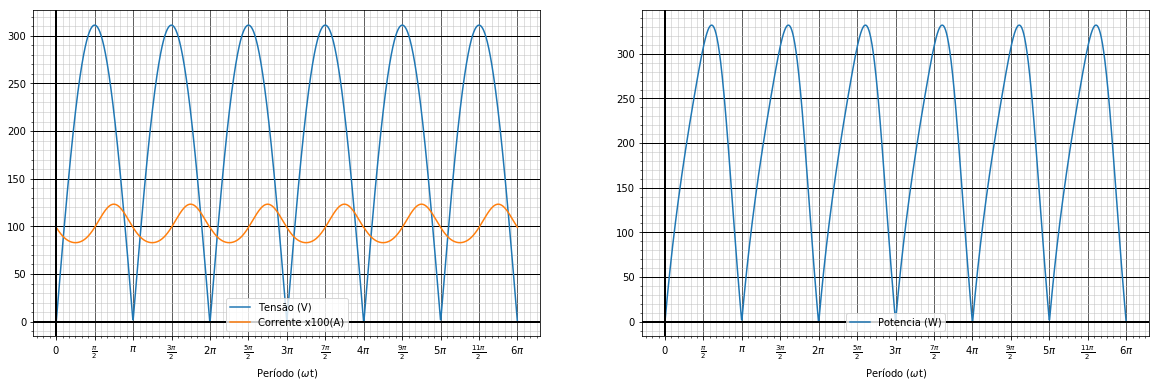

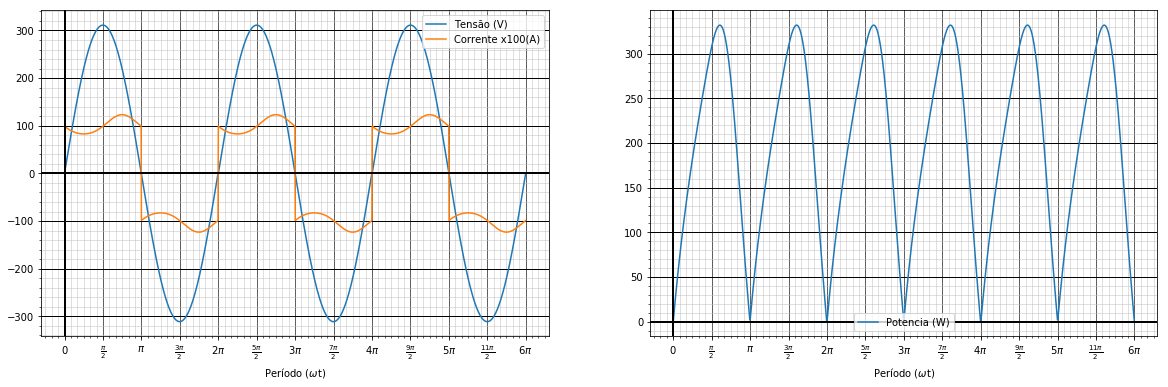

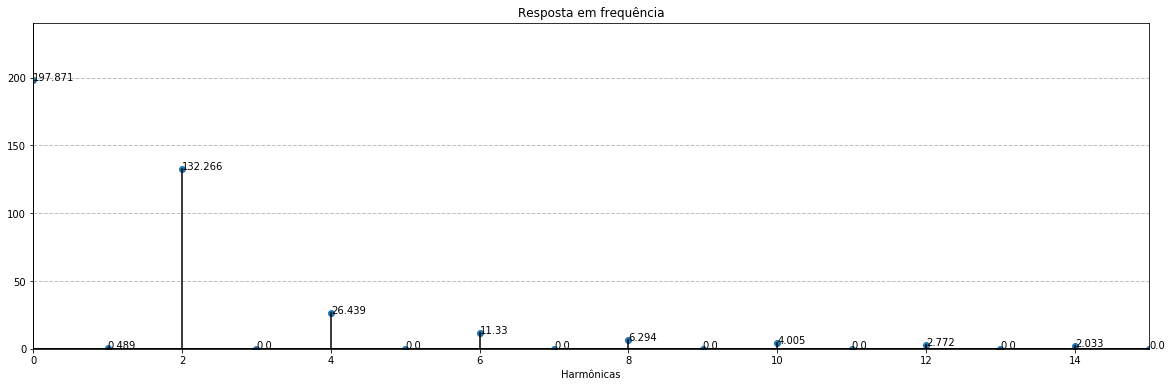

In [4]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
tal = L/R

func_vin = f'{V_pk}*sin(x)'

func_vout = f'{V_pk}*sin(x)*{degrau(a,b,1,-2)}'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Calculo das harmonicas e termos da série de Fourier para cálculo da Irms
numero_harmonicas = 4
Vh = calculo_harmonicas(func_vout, T, numero_harmonicas)
Zh = [abs(complex(R,n*XL)) for n in range(0,numero_harmonicas+1)]

# Variação na corrente de saída baseada na segunda harmônica
delta_i = 2*Vh[2]/Zh[2]

# Calculo corrente de saida
Iout_media = calculo_medio(func_vout)/R
func_iout = f'({Iout_media} + {(Vh[2]/Zh[2])}*sin(2*x+{pi}) + {(Vh[4]/Zh[4])}*cos(4*x+{pi}) + {eps}*x)'  
Iout_rms = calculo_rms(func_iout)
I_pk = calculo_pk(func_iout)

#calculo corrente entrada
func_iin = func_iout + f'*{degrau(a,b,1,-2)}'
Iin_rms = calculo_rms(func_iin)

func_p = '(' + func_vin + ')*(' + func_iin + ')'
# Considerando que a corrente RMS na fonte é igual a da carga
P = (Iin_rms**2)*R 
S = Iin_rms*(V_pk/sqrt(2))
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Parametros - #"        , "\ndelt I:\t", delta_i)
print("# - Tensão na carga - #"   , "\nVpk:\t"   , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t"  , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências - #"         , "\nPpk:\t"   , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"    , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vin, func_iin, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)